**Group Members**

Sufian Ahmad -- 450554

Hassan Saud  -- 450006

**Semester Project -- Tools and Techniques**

**Heart Disease Prediction using machine learning Techniques**

**Problem Statement**

Heart is the crucial organ which is responsible to pump the oxygen-rich blood throughout the body to supply various vital nutrients and oxygen to  tissues and organs.Consequently, it is imperative that we look after our hearts but heart diseases are becoming more common as a result of poor diet, inactivity, and a lack of fresh air. Fortunately, heart diseases can be identified by early warning signs, and machine learning techniques can be used in this regard to predict heart diseases based on datasets of these signs.

It is classification problem so following given models will be used



1.   Decision Tree
2.   Random Forest
3.   Logistic Regression
4.   Support Vector Machines
5.   K Nearest Neighbour
6.   Gaussain Navie Bayes
7.   Multi-layer Perceptron



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
np.random.seed(42)
%matplotlib inline

In [3]:
#tf.random.set_random_seed(10)

In [4]:
df=pd.read_csv("heart.csv")

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


**Features Description**

**Age**: age of the patient [years]

**Sex**: sex of the patient [M: Male, F: Female]

**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

TA--> Typical angina refers to chest pain or discomfort that has characteristic features typically associated with coronary artery disease.

ATA--> Atypical angina refers to chest discomfort that doesn't completely fit the typical pattern of classic angina but is still suggestive of potential heart-related issues.

NAP-->  Non-anginal pain refers to chest discomfort or pain that is not related to the heart or coronary artery disease.

ASY-->Asymptomatic refers to the absence of any symptoms or noticeable signs.

**RestingBP**: resting blood pressure [mm Hg]

**Cholesterol**: serum cholesterol [mm/dl]

**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST wave abnormality, LVH: LVH refers to the thickening of the muscular wall of the heart's left ventricle in response to increased workload or other conditions. ]

**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]

**Oldpeak**: oldpeak = Numeric value of ST Slope measured in depression

**ST_Slope**:

UP--> This is characterized by an upward shift of the ST segment above the baseline. It can indicate conditions such as myocardial infarction (heart attack), pericarditis, or myocarditis.

Down-->When the ST segment shifts downward from the baseline, it may suggest myocardial ischemia (inadequate blood supply to the heart)

Flat--> Sometimes, the ST segment might appear flat without a distinct elevation or depression. This can be seen in conditions like stable angina, bundle branch blocks, or medications affecting cardiac repolarization

**HeartDisease**: output class [1: heart disease, 0: Normal]


**Data Pre-Processing**

Shape of the data.

There is 1022 rows and the 12 features in data.


In [6]:
df.shape

(1022, 12)

Checking for the any duplicated values

In [7]:
df.duplicated().sum()

0

There are no duplicated values

Basic Information about the the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1022 non-null   int64  
 1   Sex             1022 non-null   object 
 2   ChestPainType   1022 non-null   object 
 3   RestingBP       1022 non-null   int64  
 4   Cholesterol     1014 non-null   float64
 5   FastingBS       1022 non-null   int64  
 6   RestingECG      1022 non-null   object 
 7   MaxHR           1022 non-null   int64  
 8   ExerciseAngina  1022 non-null   object 
 9   Oldpeak         1013 non-null   float64
 10  ST_Slope        1022 non-null   object 
 11  HeartDisease    1022 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 95.9+ KB


So dataset contain the categorical, integer and float data types with 918 data points

Statistical Analysis

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1022.000000,1022.00000,1014.000000,1022.000000,1022.000000,1013.000000,1022.000000
mean,53.566536,134.02544,243.736686,0.225049,136.955969,0.874926,0.543053
std,9.377541,18.07199,55.160689,0.417819,24.983109,1.075602,0.498387
min,28.000000,80.00000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.00000,209.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,132.00000,238.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,145.00000,273.000000,0.000000,155.000000,1.500000,1.000000
max,79.000000,200.00000,603.000000,1.000000,202.000000,6.200000,1.000000


Check for the missing values

In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       8
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           9
ST_Slope          0
HeartDisease      0
dtype: int64

There are two features Cholesterol and Oldpeak that has the missing values.
We will fill these missing values by the mean of the features

In [11]:
#For Cholesterol
mean_of_cholesterol=df["Cholesterol"].mean()
df['Cholesterol'].fillna(mean_of_cholesterol,inplace=True)
#For Old Peak
mean_of_oldpeak=df["Oldpeak"].mean()
df['Oldpeak'].fillna(mean_of_oldpeak,inplace=True)

In [12]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Now there is no missing values in data.

In [13]:
df["HeartDisease"].value_counts()

1    555
0    467
Name: HeartDisease, dtype: int64

<Axes: title={'center': 'Target Varable'}, xlabel='class', ylabel='count'>

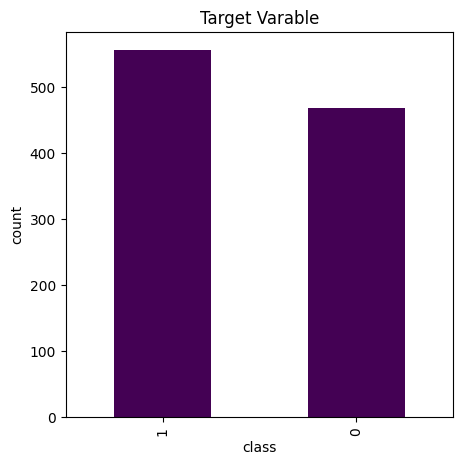

In [14]:
df["HeartDisease"].value_counts().plot(kind='bar', title = 'Target Varable', colormap = 'viridis',figsize=(5,5),xlabel="class",ylabel="count")

**Exploratory Data Analysis**

In [15]:
df["Sex"].value_counts()

M    783
F    239
Name: Sex, dtype: int64

There are 783 male patients and 293 Female patients

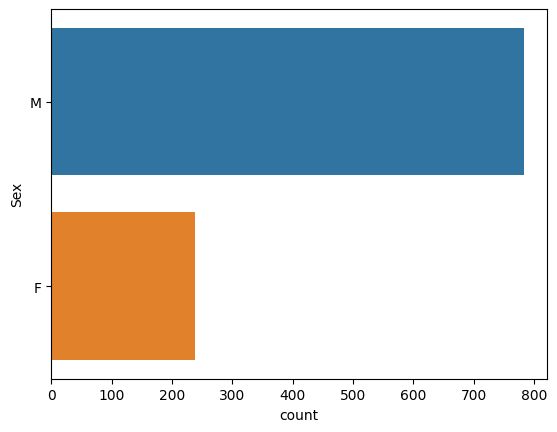

In [16]:
sns.countplot(data=df,  y='Sex' );

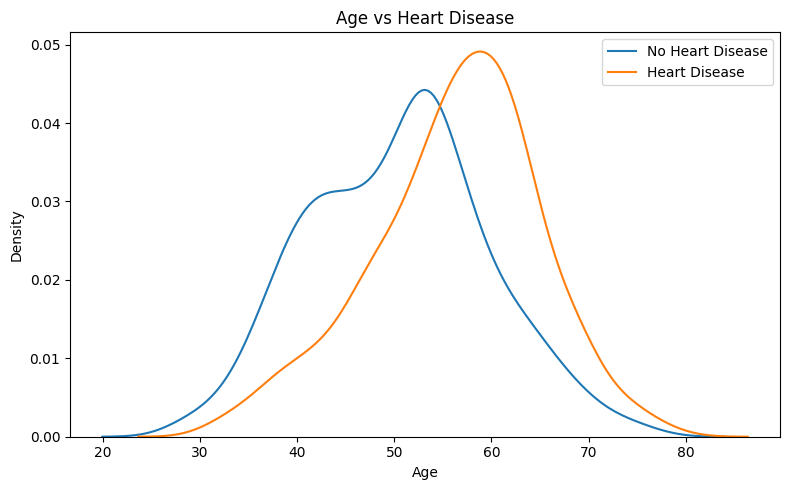

In [17]:
no_heart = df.query('HeartDisease == 0')
heart = df.query('HeartDisease == 1')
plt.figure(figsize = (8,5))
plt.title("Age vs Heart Disease")
sns.kdeplot(x = no_heart["Age"], label = "No Heart Disease")
sns.kdeplot(x = heart["Age"], label = "Heart Disease")
plt.legend()
plt.tight_layout()

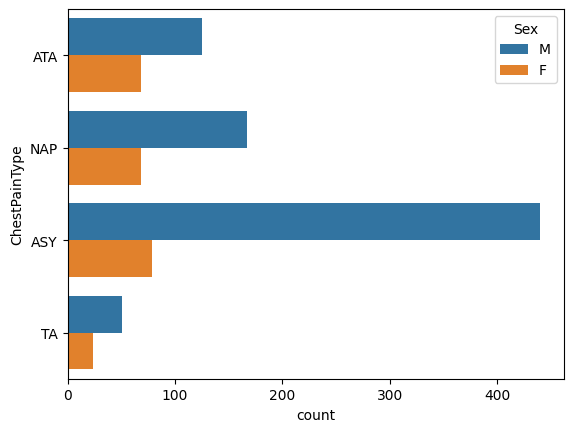

In [18]:
sns.countplot(data=df,  y='ChestPainType', hue='Sex' );


As we can see male patients are mostly suffered from the chest pain.

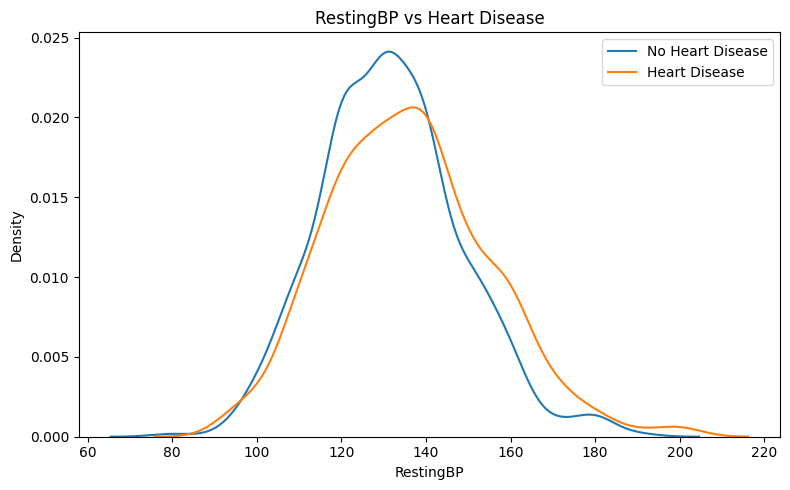

In [19]:
plt.figure(figsize = (8,5))
plt.title("RestingBP vs Heart Disease")
sns.kdeplot(x = no_heart["RestingBP"], label = "No Heart Disease")
sns.kdeplot(x = heart["RestingBP"], label = "Heart Disease")
plt.legend()
plt.tight_layout()

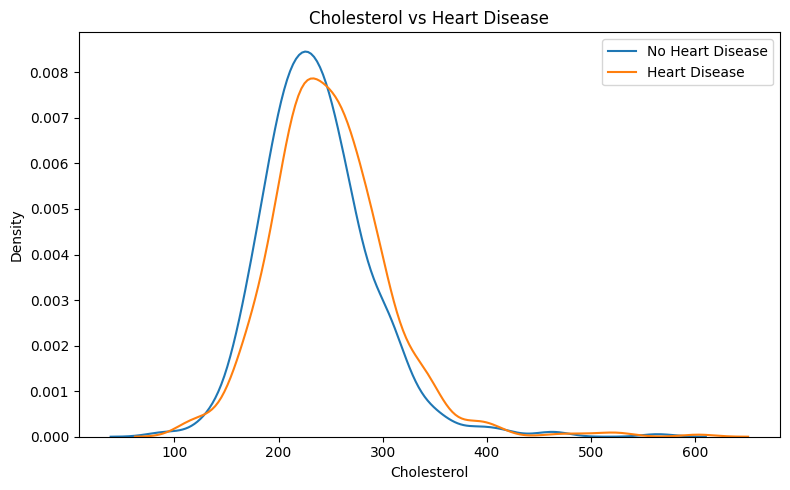

In [20]:
plt.figure(figsize = (8,5))
plt.title("Cholesterol vs Heart Disease")
sns.kdeplot(x = no_heart["Cholesterol"], label = "No Heart Disease")
sns.kdeplot(x = heart["Cholesterol"], label = "Heart Disease")
plt.legend()
plt.tight_layout()


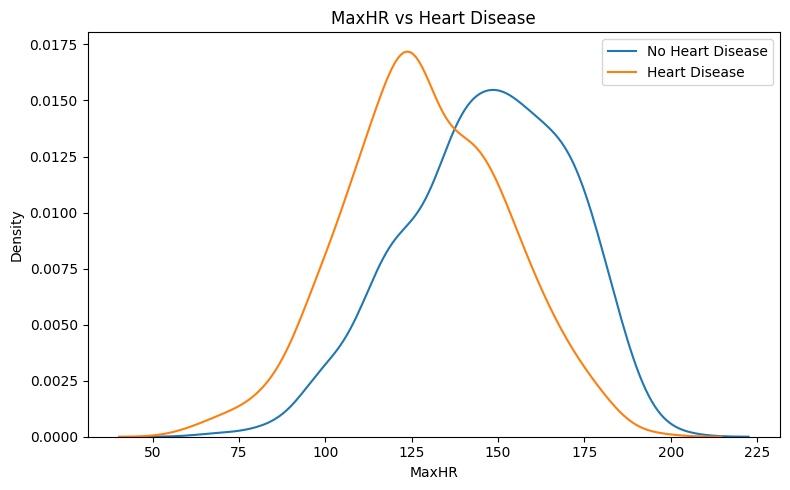

In [21]:
plt.figure(figsize = (8,5))
plt.title("MaxHR vs Heart Disease")
sns.kdeplot(x = no_heart["MaxHR"], label = "No Heart Disease")
sns.kdeplot(x = heart["MaxHR"], label = "Heart Disease")
plt.legend()
plt.tight_layout()

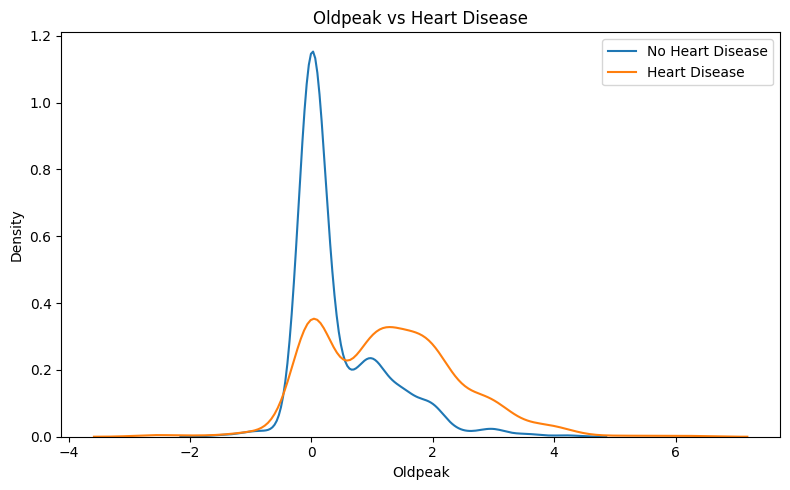

In [22]:
plt.figure(figsize = (8,5))
plt.title("Oldpeak vs Heart Disease")
sns.kdeplot(x = no_heart["Oldpeak"], label = "No Heart Disease")
sns.kdeplot(x = heart["Oldpeak"], label = "Heart Disease")
plt.legend()
plt.tight_layout()


In [23]:
df["FastingBS"].value_counts()

0    792
1    230
Name: FastingBS, dtype: int64

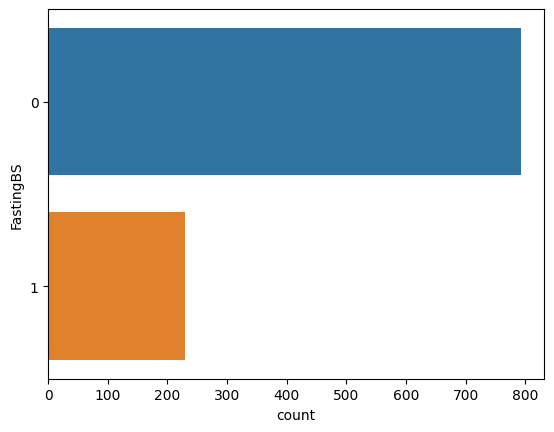

In [24]:
sns.countplot(data=df,  y='FastingBS');

In [25]:
df["ExerciseAngina"].value_counts()

N    599
Y    423
Name: ExerciseAngina, dtype: int64

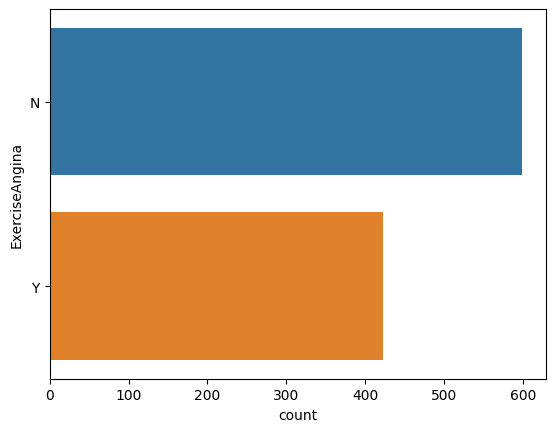

In [26]:
sns.countplot(data=df,  y='ExerciseAngina');

599 patients have the no angina after the exercise and 423 patients suffered from it.

In [27]:
df["ST_Slope"].value_counts()

Flat    515
Up      438
Down     69
Name: ST_Slope, dtype: int64

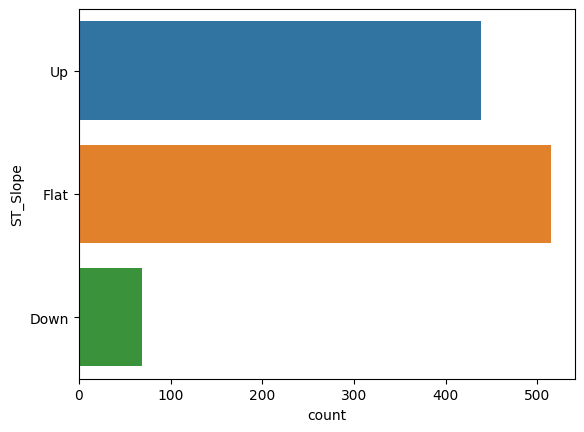

In [28]:
sns.countplot(data=df,  y='ST_Slope');

In [29]:
df["RestingECG"].value_counts()

Normal    622
LVH       211
ST        189
Name: RestingECG, dtype: int64

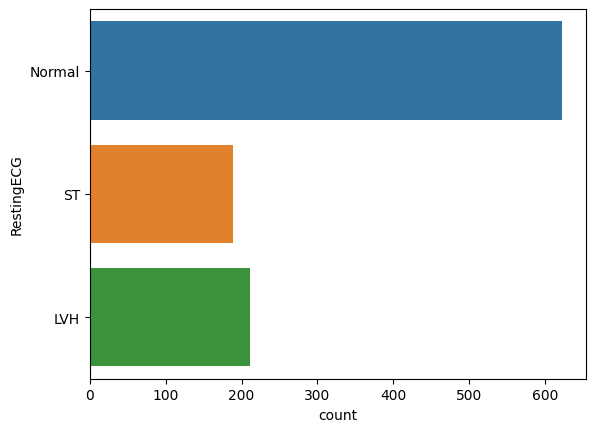

In [30]:
sns.countplot(data=df,  y='RestingECG');

Most of the Patients have the resting ECG Normal.

**Features vs Target Variables**

In [31]:
col = list(df.columns)
cat_features = []
num_features = []
for i in col:
    if len(df[i].unique()) > 6:
        num_features.append(i)
    else:
        cat_features.append(i)

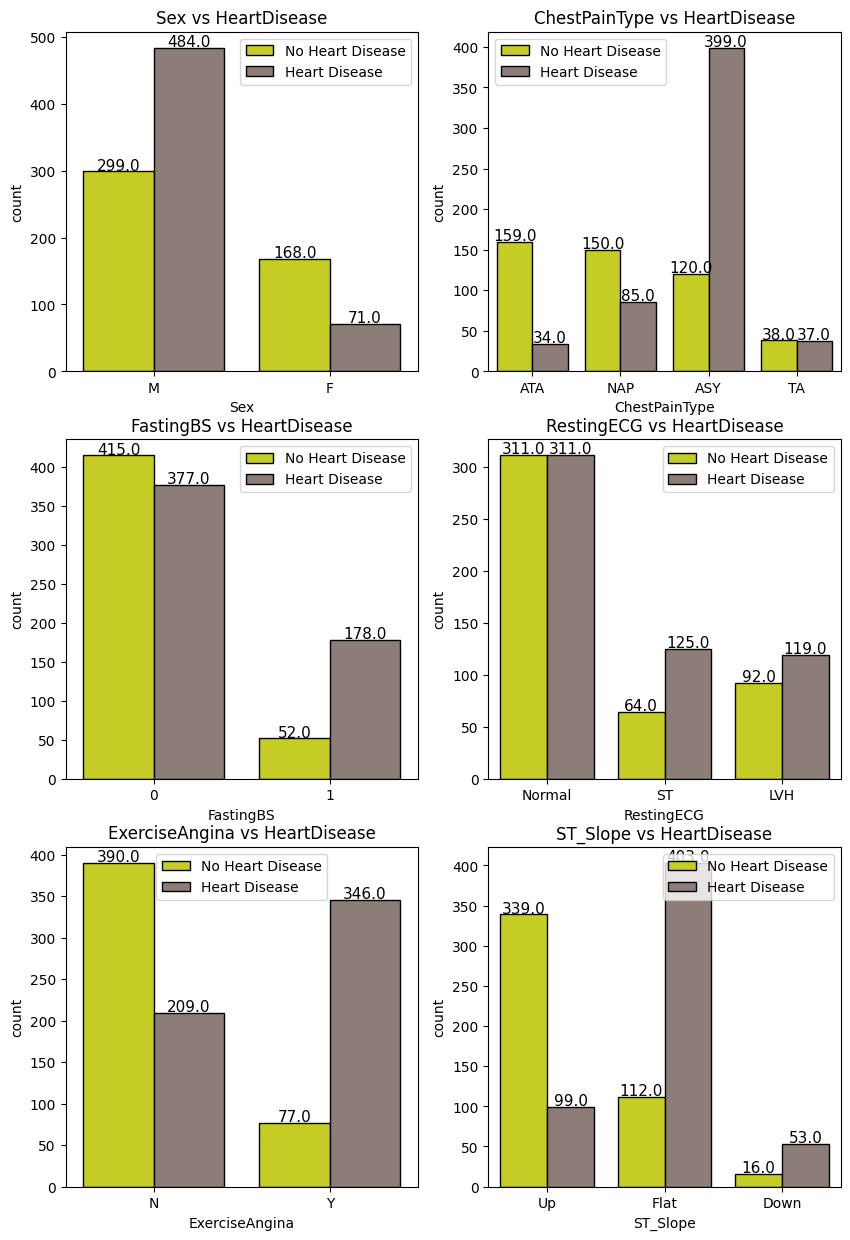

In [32]:
colors = ['#DEE80A','#8F7B76']
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(cat_features) - 1):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=df[cat_features[i]],data = df,hue = "HeartDisease",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = cat_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

**Box Plot**

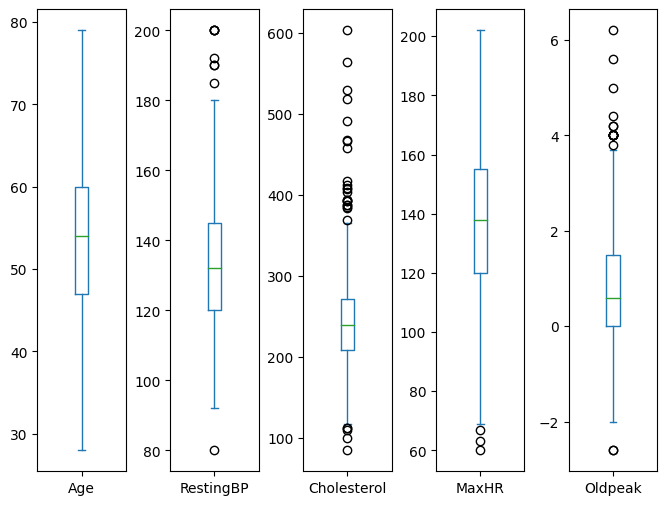

In [33]:
#fig = px.box(df[num_features],points="all")
#fig.show()
df[num_features].plot(
    kind='box',
    subplots=True,
    sharey=False,
    #points="all",
    figsize=(8, 6)
)
plt.subplots_adjust(wspace=0.5)
plt.show()

Removing the ouliers

In [34]:
def outlier_remover(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
  return outliers

In [35]:
for i in range(1,len(num_features)):
  outliers=outlier_remover(num_features[i])
  df = df.drop(outliers.index)

After Outliers Removing

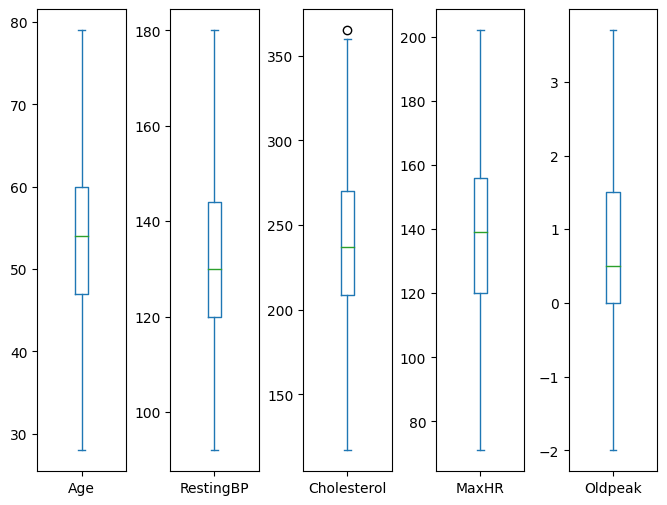

In [36]:
df[num_features].plot(
    kind='box',
    subplots=True,
    sharey=False,
    #points="all",
    figsize=(8, 6)
)
plt.subplots_adjust(wspace=0.5)
plt.show()

**Correlation Matrix**

<ipython-input-37-dbdbf7da58ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.drop('HeartDisease',axis=1).corr()


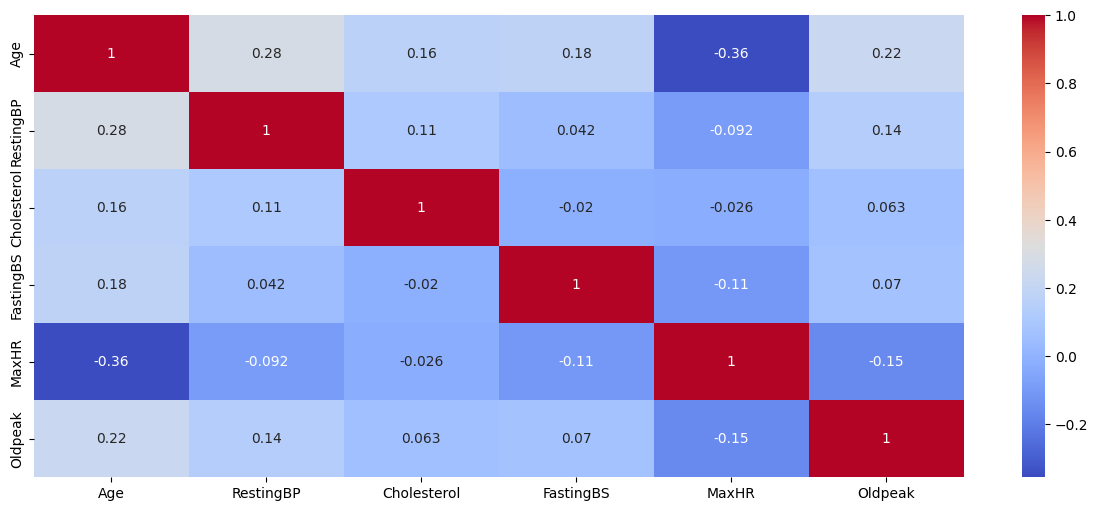

In [37]:
corr_matrix=df.drop('HeartDisease',axis=1).corr()
plt.figure(figsize = (15,6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

As we can see there is not much correlation between variables but from medical point of view these features are relevant for prediction of heart disease.

Normalize the data

In [38]:
normalize= StandardScaler() # Standardization
df['Oldpeak'] = normalize.fit_transform(df[['Oldpeak']])
df['Age'] = normalize.fit_transform(df[['Age']])
df['RestingBP'] = normalize.fit_transform(df[['RestingBP']])
df['Cholesterol'] = normalize.fit_transform(df[['Cholesterol']])
df['MaxHR'] = normalize.fit_transform(df[['MaxHR']])

Appied the Encoding Technique onto categorical features

In [39]:
label_encod= LabelEncoder()
df['Sex'] = label_encod.fit_transform(df['Sex'])
df['ChestPainType'] = label_encod.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encod.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encod.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encod.fit_transform(df['ST_Slope'])

Machine Learning Modelling

In [40]:
df["HeartDisease"].value_counts()

1    514
0    454
Name: HeartDisease, dtype: int64

Train test split

In [41]:
X=df.drop("HeartDisease",axis=1)
Y=df["HeartDisease"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [43]:
precision_scores={}
accuracy_scores={}
recall_scores={}
f1_scores={}
auc_scores={}

In [44]:
#plot ROC Curve
def roc_curve(y_test,y_pred_proba):
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  #create ROC curve
  plt.plot(fpr,tpr)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title("ROC Curve")
  plt.show()

**Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        75
           1       0.81      0.77      0.79       119

    accuracy                           0.75       194
   macro avg       0.74      0.75      0.74       194
weighted avg       0.76      0.75      0.75       194



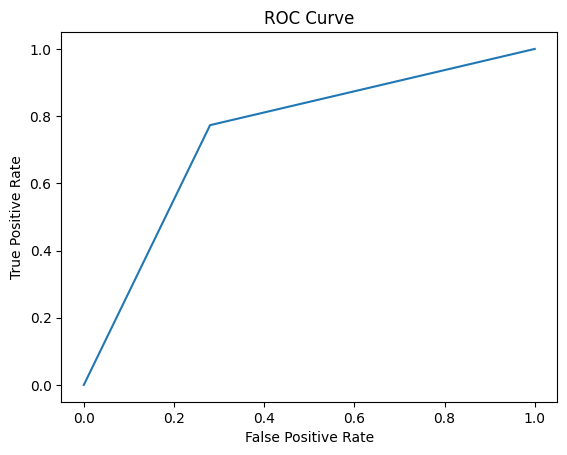

AUC Score is : 0.7465546218487394
The oveall precision score is :  0.8141592920353983


<Axes: >

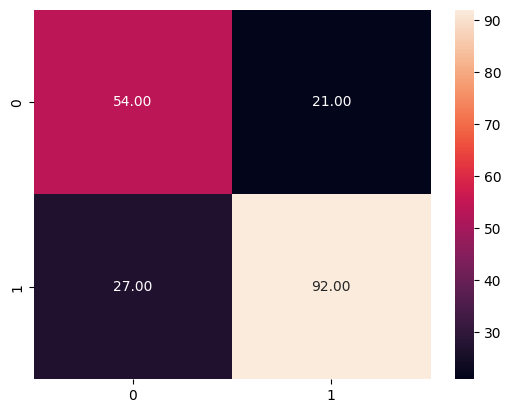

In [45]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train,y_train)
pred_dt= model_decision_tree.predict(X_test)
report_dt=classification_report(y_test, pred_dt)
print(report_dt)

#Roc_Curve
y_pred_proba_dt = model_decision_tree.predict_proba(X_test)[::,1]
roc_curve(y_test,y_pred_proba_dt)
auc = metrics.roc_auc_score(y_test, y_pred_proba_dt)
print("AUC Score is :",auc)
auc_scores["auc_decision_tree"]=auc

score_dt = precision_score(y_test,pred_dt)
accu_score_dt=accuracy_score(y_test, pred_dt)
recall_score_dt=recall_score(y_test, pred_dt)
f1_score_dt=f1_score(y_test, pred_dt)

recall_scores["Decision_Tree"]=recall_score_dt
f1_scores["Decision_Tree"]=f1_score_dt
accuracy_scores["Decision_Tree"]=accu_score_dt
precision_scores["Decision_Tree"]=score_dt

print("The oveall precision score is : ",score_dt)
sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True, fmt='.2f')



**Random Frorest Classifier**

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        75
           1       0.85      0.87      0.86       119

    accuracy                           0.82       194
   macro avg       0.82      0.81      0.81       194
weighted avg       0.82      0.82      0.82       194



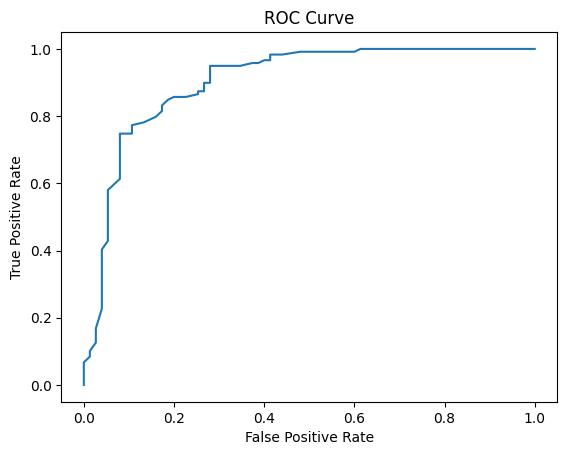

AUC Score is : 0.9030252100840336
The oveall precision score is :  0.8455284552845529


<Axes: >

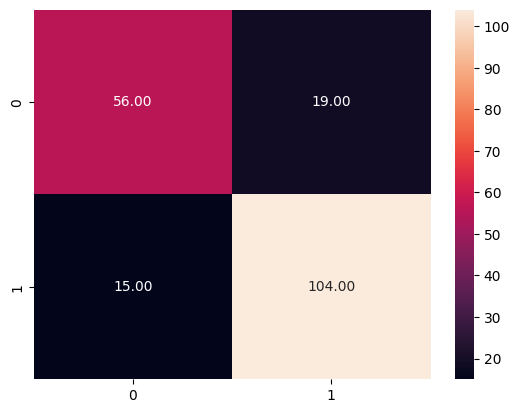

In [46]:
model_random_forest = RandomForestClassifier(random_state=42)
model_random_forest.fit(X_train,y_train)
pred_rf = model_random_forest.predict(X_test)
print(classification_report(y_test, pred_rf))

y_pred_proba_rf = model_random_forest.predict_proba(X_test)[::,1]
roc_curve(y_test,y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)
print("AUC Score is :",auc)
auc_scores["auc_random_forest"]=auc

score_rf = precision_score(y_test,pred_rf)
accu_score_rf=accuracy_score(y_test, pred_rf)
recall_score_rf=recall_score(y_test, pred_rf)
f1_score_rf=f1_score(y_test, pred_rf)

recall_scores["Random_Forest"]=recall_score_rf
f1_scores["Random_Forest"]=f1_score_rf
accuracy_scores["Random_Forest"]=accu_score_rf
precision_scores["Random_Forest"]=score_rf
print("The oveall precision score is : ",score_rf)
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, fmt='.2f')

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        75
           1       0.87      0.87      0.87       119

    accuracy                           0.85       194
   macro avg       0.84      0.84      0.84       194
weighted avg       0.85      0.85      0.85       194



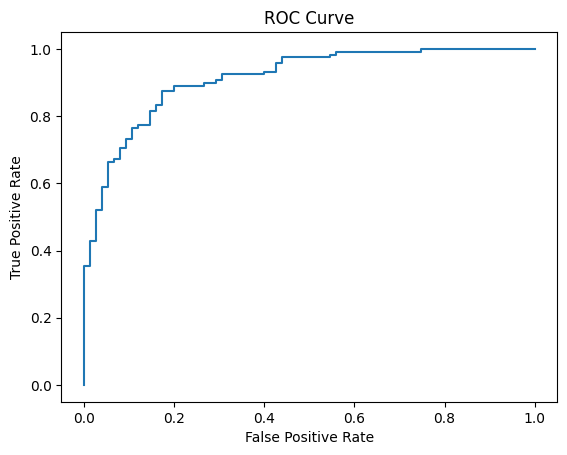

AUC Score is : 0.9131652661064426
The oveall precision score is :  0.8739495798319328


<Axes: >

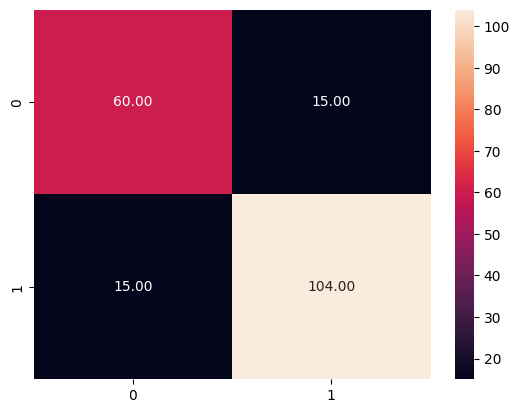

In [47]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, pred_lr))

y_pred_proba_lr = model_lr.predict_proba(X_test)[::,1]
roc_curve(y_test,y_pred_proba_lr)
auc = metrics.roc_auc_score(y_test, y_pred_proba_lr)
print("AUC Score is :",auc)
auc_scores["auc_lr"]=auc

score_lr = precision_score(y_test,pred_lr)
accu_score_lr=accuracy_score(y_test, pred_lr)
recall_score_lr=recall_score(y_test, pred_lr)
f1_score_lr=f1_score(y_test, pred_lr)

recall_scores["Logistic_Regression"]=recall_score_lr
f1_scores["Logistic_Regression"]=f1_score_lr
accuracy_scores["Logistic_Regression"]=accu_score_lr
precision_scores["Logistic_Regression"]=score_lr
print("The oveall precision score is : ",score_lr)
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True, fmt='.2f')

**Support Vector Machine Classifier**

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        75
           1       0.86      0.88      0.87       119

    accuracy                           0.84       194
   macro avg       0.83      0.83      0.83       194
weighted avg       0.84      0.84      0.84       194



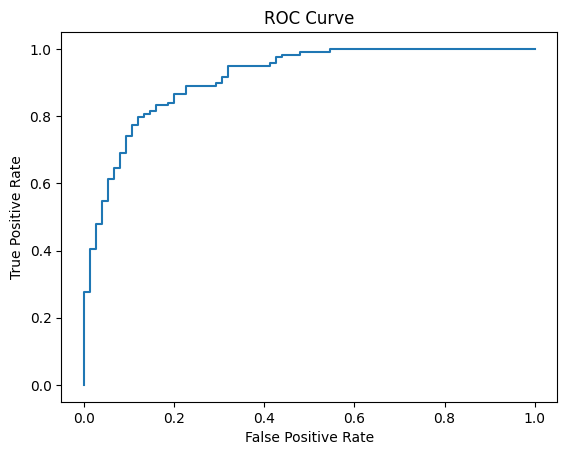

AUC Score is : 0.9143977591036414
The oveall precision score is :  0.860655737704918


<Axes: >

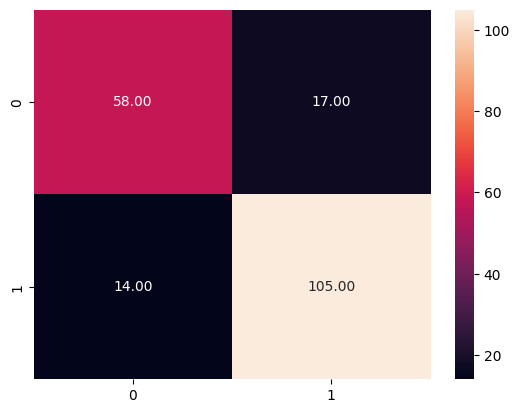

In [48]:
model_svm = SVC(probability=True)
model_svm.fit(X_train,y_train)
pred_svm = model_svm.predict(X_test)
print(classification_report(y_test, pred_svm))

y_pred_proba_svm = model_svm.predict_proba(X_test)[::,1]
roc_curve(y_test,y_pred_proba_svm)
auc = metrics.roc_auc_score(y_test, y_pred_proba_svm)
print("AUC Score is :",auc)
auc_scores["auc_svm"]=auc


score_svm = precision_score(y_test,pred_svm)
accu_score_svm=accuracy_score(y_test, pred_svm)
recall_score_svm=recall_score(y_test, pred_svm)
f1_score_svm=f1_score(y_test, pred_svm)

recall_scores["SVM_Classifier"]=recall_score_svm
f1_scores["SVM_Classifier"]=f1_score_svm
accuracy_scores["SVM_Classifier"]=accu_score_svm
precision_scores["SVM_Classifier"]=score_svm
print("The oveall precision score is : ",score_svm)
sns.heatmap(confusion_matrix(y_test, pred_svm), annot=True, fmt='.2f')

**KNN**

              precision    recall  f1-score   support

           0       0.76      0.75      0.75        75
           1       0.84      0.85      0.85       119

    accuracy                           0.81       194
   macro avg       0.80      0.80      0.80       194
weighted avg       0.81      0.81      0.81       194



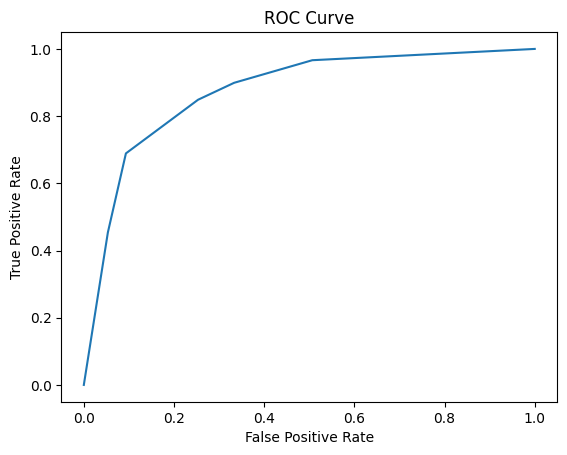

AUC Score is : 0.8746218487394958
The oveall precision score is :  0.8416666666666667


<Axes: >

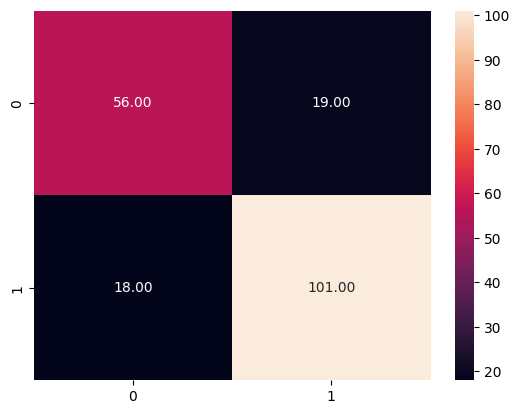

In [49]:
model_KNN= KNeighborsClassifier()
model_KNN.fit(X_train,y_train)
pred_KNN = model_KNN.predict(X_test)
print(classification_report(y_test, pred_KNN))

y_pred_proba_knn = model_KNN.predict_proba(X_test)[::,1]
roc_curve(y_test,y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)
print("AUC Score is :",auc)
auc_scores["auc_KNN"]=auc

score_KNN = precision_score(y_test,pred_KNN)
accu_score_KNN=accuracy_score(y_test, pred_KNN)
recall_score_KNN=recall_score(y_test, pred_KNN)
f1_score_KNN=f1_score(y_test, pred_KNN)

recall_scores["KNN_Classifier"]=recall_score_KNN
f1_scores["KNN_Classifier"]=f1_score_KNN
accuracy_scores["KNN_Classifier"]=accu_score_KNN
precision_scores["KNN_Classifier"]=score_KNN
print("The oveall precision score is : ",score_KNN)
sns.heatmap(confusion_matrix(y_test, pred_KNN), annot=True, fmt='.2f')

**Gaussian Navie Bayes**

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        75
           1       0.87      0.84      0.85       119

    accuracy                           0.82       194
   macro avg       0.81      0.82      0.82       194
weighted avg       0.83      0.82      0.83       194



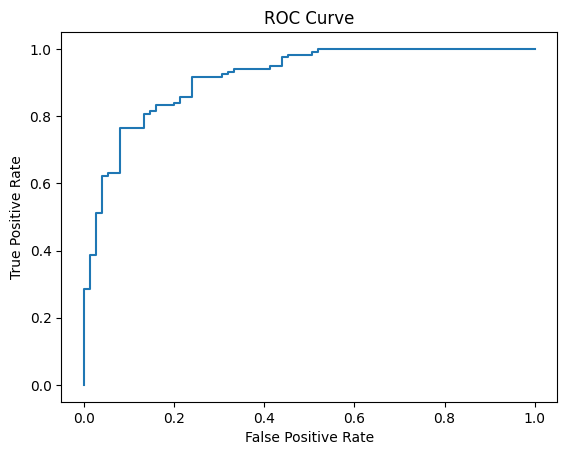

AUC Score is : 0.9157422969187674
The oveall precision score is :  0.8695652173913043


<Axes: >

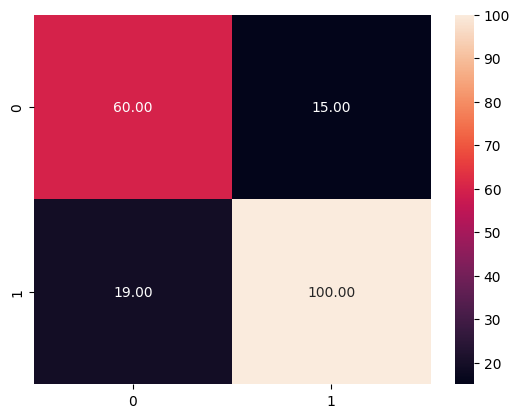

In [50]:
model_gnb= GaussianNB()
model_gnb.fit(X_train,y_train)
pred_gnb = model_gnb.predict(X_test)
print(classification_report(y_test, pred_gnb))

y_pred_proba_gnb = model_gnb.predict_proba(X_test)[::,1]
roc_curve(y_test,y_pred_proba_gnb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_gnb)
print("AUC Score is :",auc)
auc_scores["auc_gnb"]=auc

score_gnb = precision_score(y_test,pred_gnb)
recall_score_gnb=recall_score(y_test, pred_gnb)
f1_score_gnb=f1_score(y_test, pred_gnb)

recall_scores["Gaussian_Navie_Bayes"]=recall_score_gnb
f1_scores["Gaussian_Navie_Bayes"]=f1_score_gnb
accu_score_gnb=accuracy_score(y_test, pred_gnb)
accuracy_scores["Gaussian_Navie_Bayes"]=accu_score_gnb
precision_scores["Gaussian_Navie_Bayes"]=score_gnb
print("The oveall precision score is : ",score_gnb)
sns.heatmap(confusion_matrix(y_test, pred_gnb), annot=True, fmt='.2f')

**Multi Layer Perceptron**

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(44, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 44)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 45        
                                                                 
Total params: 705 (2.75 KB)
Trainable params: 705 (2.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()])

In [55]:
model.fit(X_train, y_train, epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 3ms/step - loss: 0.6846 - accuracy: 0.5685 - precision: 0.5457
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7158 - precision: 0.6882
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7429 - precision: 0.7462
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7597 - precision: 0.7593
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7687 - precision: 0.7700
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7946 - precision: 0.8207
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7933 - precision: 0.8068
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8010 - precision: 0.8163
Epoch 9/150
25/25 [=============================

In [56]:
pred_ml=model.predict(X_test)
pred_ml=pred_ml.round().astype('int')

7/7 [==============================] - 0s 2ms/step


The oveall precision score is :  0.8429752066115702


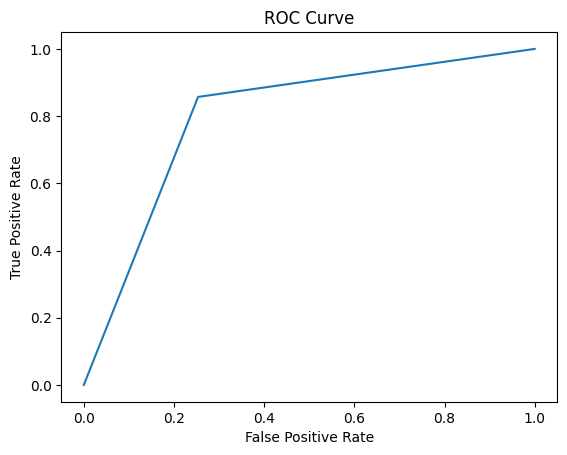

AUC Score is : 0.8019047619047618


<Axes: >

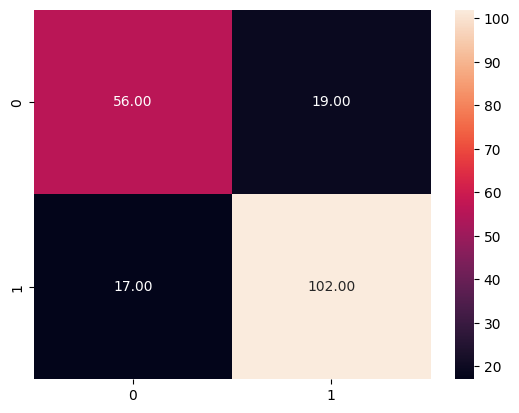

In [57]:
score_ml = precision_score(y_test,pred_ml)
precision_scores["Multi-layer-Perceptron"]=score_ml
print("The oveall precision score is : ",score_ml)
accu_score_ml=accuracy_score(y_test, pred_ml)
recall_score_ml=recall_score(y_test, pred_ml)
f1_score_ml=f1_score(y_test, pred_ml)

roc_curve(y_test,pred_ml)
auc = metrics.roc_auc_score(y_test, pred_ml)
print("AUC Score is :",auc)
auc_scores["auc_mlp"]=auc

recall_scores["Multi-layer-Perceptron"]=recall_score_ml
f1_scores["Multi-layer-Perceptron"]=f1_score_ml
accuracy_scores["Multi-layer-Perceptron"]=accu_score_ml
sns.heatmap(confusion_matrix(y_test, pred_ml), annot=True, fmt='.2f')

In [80]:
precision_df=pd.DataFrame(precision_scores,index=[0])
precision_df.T

,0
Decision_Tree,0.814159
Random_Forest,0.845528
Logistic_Regression,0.873950
SVM_Classifier,0.860656
KNN_Classifier,0.841667
Gaussian_Navie_Bayes,0.869565
Multi-layer-Perceptron,0.842975


<Axes: title={'center': 'Precision score of Models'}, xlabel='models', ylabel='precisions score'>

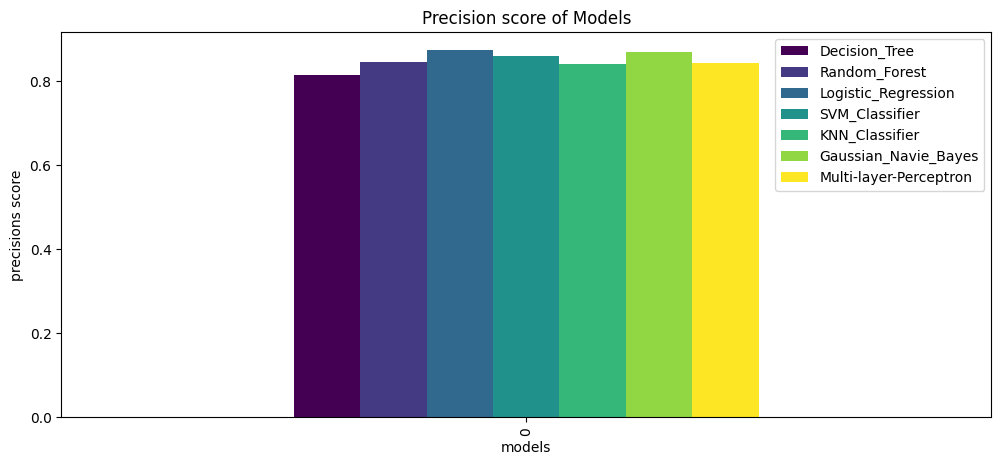

In [79]:
precision_df.plot(kind='bar', title = 'Precision score of Models', colormap = 'viridis',figsize=(12,5),xlabel="models",ylabel="precisions score")

In [78]:
accuracy_df=pd.DataFrame(accuracy_scores,index=[0])
accuracy_df.T

,0
Decision_Tree,0.752577
Random_Forest,0.824742
Logistic_Regression,0.845361
SVM_Classifier,0.840206
KNN_Classifier,0.809278
Gaussian_Navie_Bayes,0.824742
Multi-layer-Perceptron,0.814433


<Axes: title={'center': 'Accuracy score of Models'}, xlabel='models', ylabel='accuracy score'>

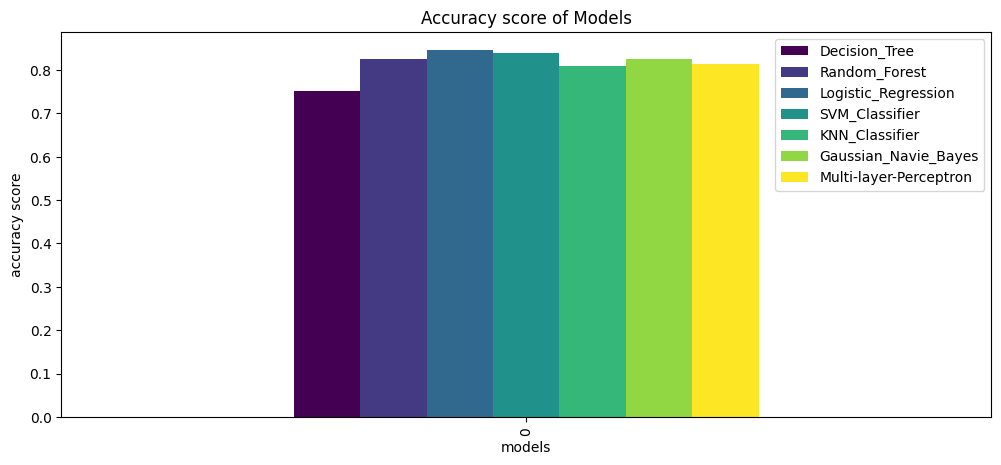

In [77]:
accuracy_df.plot(kind='bar', title = 'Accuracy score of Models', colormap = 'viridis',figsize=(12,5),xlabel="models",ylabel="accuracy score")

In [76]:
recall_df=pd.DataFrame(recall_scores,index=[0])
recall_df.T


,0
Decision_Tree,0.773109
Random_Forest,0.873950
Logistic_Regression,0.873950
SVM_Classifier,0.882353
KNN_Classifier,0.848739
Gaussian_Navie_Bayes,0.840336
Multi-layer-Perceptron,0.857143


<Axes: title={'center': 'Recall score of Models'}, xlabel='models', ylabel='recall score'>

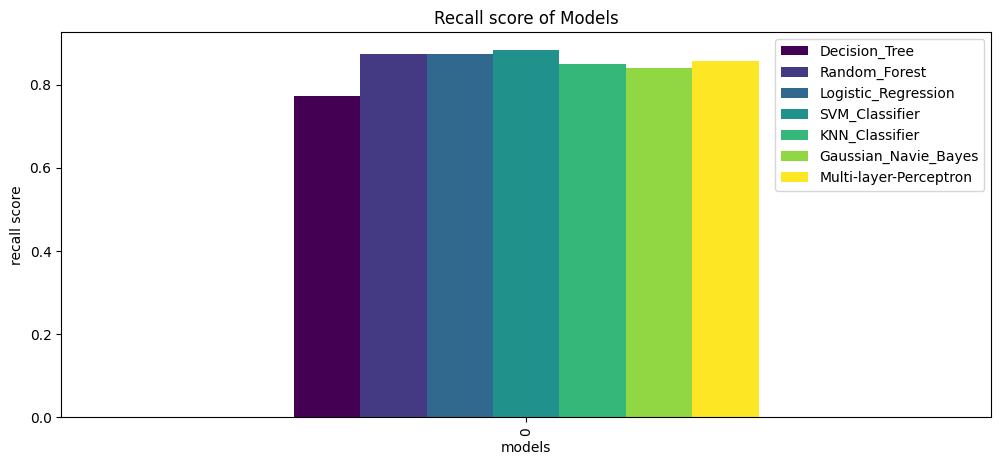

In [75]:
recall_df.plot(kind='bar', title = 'Recall score of Models', colormap = 'viridis',figsize=(12,5),xlabel="models",ylabel="recall score")

In [82]:
f1_df=pd.DataFrame(f1_scores,index=[0])
f1_df.T

,0
Decision_Tree,0.793103
Random_Forest,0.859504
Logistic_Regression,0.873950
SVM_Classifier,0.871369
KNN_Classifier,0.845188
Gaussian_Navie_Bayes,0.854701
Multi-layer-Perceptron,0.850000


<Axes: title={'center': 'F1 Score of Models'}, xlabel='models', ylabel='F1 Score'>

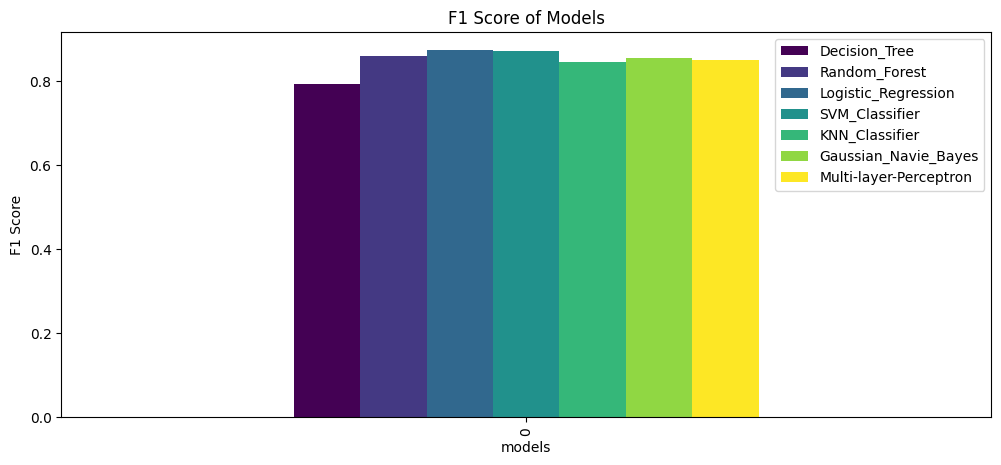

In [81]:
f1_df.plot(kind='bar', title = 'F1 Score of Models', colormap = 'viridis',figsize=(12,5),xlabel="models",ylabel="F1 Score")

The model which has higher Precision Score

In [62]:
compare_all_scores={}

In [63]:
higher_precision=precision_df.idxmax(axis=1)
compare_all_scores[f"{higher_precision[0]}_Precision"]=precision_df[higher_precision[0]][0]
print("The model",higher_precision[0],"have the higher precision score")

The model Logistic_Regression have the higher precision score


In [64]:
higher_accuracy=accuracy_df.idxmax(axis=1)
compare_all_scores[f"{higher_accuracy[0]}_Accuracy"]=precision_df[higher_accuracy[0]][0]
print("The model",higher_accuracy[0],"have the higher accuracy score")

The model Logistic_Regression have the higher accuracy score


In [65]:
higher_recall=recall_df.idxmax(axis=1)
compare_all_scores[f"{higher_recall[0]}_Recall"]=precision_df[higher_recall[0]][0]
print("The model",higher_recall[0],"have the higher recall score")

The model SVM_Classifier have the higher recall score


In [66]:
higher_f1=f1_df.idxmax(axis=1)
compare_all_scores[f"{higher_f1[0]}_F1"]=precision_df[higher_f1[0]][0]
print("The model",higher_f1[0],"have the higher F1 score")

The model Logistic_Regression have the higher F1 score


<Axes: title={'center': 'Model which have high scores'}, xlabel='models', ylabel='Scores'>

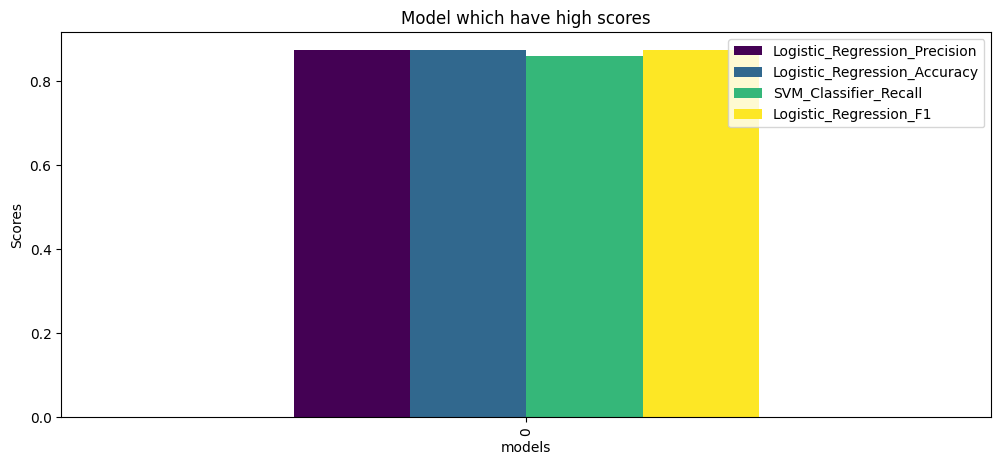

In [67]:
compare_all_scores_df=pd.DataFrame(compare_all_scores,index=[0])
compare_all_scores_df.plot(kind='bar', title = 'Model which have high scores', colormap = 'viridis',figsize=(12,5),xlabel="models",ylabel="Scores")



**Models based on their AUC Score**

In [68]:
auc_df=pd.DataFrame(auc_scores,index=[0])
auc_df


,auc_decision_tree,auc_random_forest,auc_lr,auc_svm,auc_KNN,auc_gnb,auc_mlp
0,0.746555,0.903025,0.913165,0.914398,0.874622,0.915742,0.801905


<Axes: title={'center': 'AUC Score of Models'}, xlabel='models', ylabel='AUC Score'>

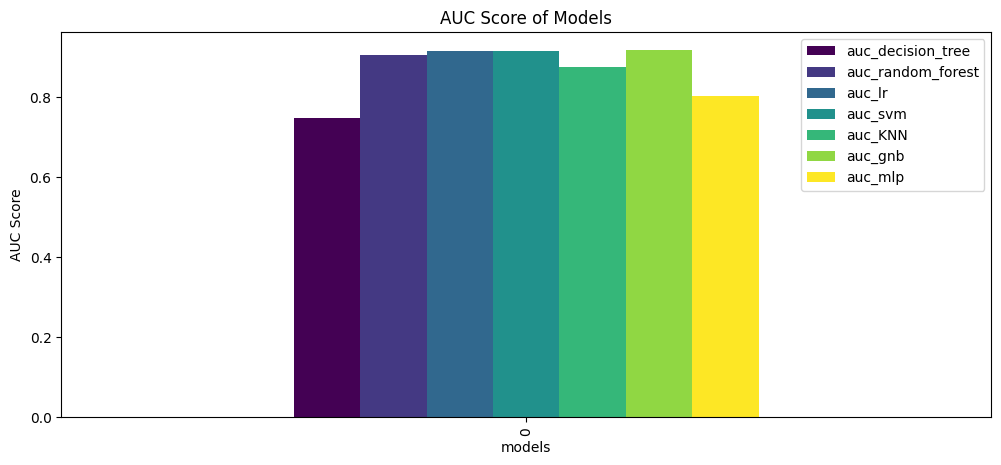

In [69]:
auc_df.plot(kind='bar', title = 'AUC Score of Models', colormap = 'viridis',figsize=(12,5),xlabel="models",ylabel="AUC Score")

**Selecting Our Best Model**

**Our dataset is balanced therefore we choose precision, accuracy and recall as the criteria to select the best model for heart disease classification.
By observing the precision, accuracy and recall of all models we concluded that Logistic Regression is the best model**

**Comparison Between Models**


1.   Decision tree performs well on classification problems but it has drawback of overfitting and sensitive to variation in data. Moreover it is unable to handle complex non linear relationship between features which might be reason it does not perform well on heart disease dataset.

2.   Random Forest is suitable for classification when the number of features are large but again it suffer from overfitting problem which might be reason that it did not make correct prediction in this case as expected.

3.   Logistic regression best suited for binary classification due to its sigmoid function and it is  observed that it is best model among all in our case.

4.   SVM perform well on classification and it inherently provides class predictions without directly giving probability estimates for the target classes which might be reason it did not perform well in this case.

5.   KNN works well on the numerical data and it assume that datapoint belongs to nearby class which is not always the case and it is sensitive to outliers and irrelevant features. Moreover larger value of single feature may dominant the distance calculation which may effect the result. Some of our features were having large scale values as compared to other so it might be reason it did not make prediction accurate.

6.   Gaussian Navie bayes assume that data has the normal distribution and it works well on numerical data when target variable is categorical. It also assumes the linear independence among features and also consider that features follows the normal distributon. In contrast, some of our numerical feature did not follow the normal distribution which is reason it did not perform well.

7.   Multi-layer perceptron can be used for binary or mulit-class classification. Selection of number of neuron is crucial in MLP and it requires the large amount of data for training which is the reason it did not perfrom well.









**------------------------------------------------------------------------------**